# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [187]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [188]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

seaborn.set_theme(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [189]:
data = pandas.read_csv('train.csv', delimiter=',', index_col=0)

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [190]:
train_data = data.sample(frac=0.7)
test_data = data[~data.index.isin(train_data.index)]

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [191]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column    = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [192]:
train_features, train_target = get_features_and_target(train_data)
test_features, test_target = get_features_and_target(test_data)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Введем необходимые для обработки таблицы (для сокращения и упрощения кода):

In [193]:
train_classes = numpy.array(sorted(train_features['Pclass'].unique()))

train_features_male         = train_features[train_features['Sex'] == 'male']
train_features_female       = train_features[train_features['Sex'] == 'female']
train_features_alive        = train_features[train_target == 1]
train_features_alive_male   = train_features_alive[train_features_alive['Sex'] == 'male']
train_features_alive_female = train_features_alive[train_features_alive['Sex'] == 'female']

train_features_age              = train_features.dropna(subset=['Age'])
train_features_male_age         = train_features_male.dropna(subset=['Age'])
train_features_female_age       = train_features_female.dropna(subset=['Age'])
train_features_alive_age        = train_features_alive.dropna(subset=['Age'])
train_features_alive_male_age   = train_features_alive_male.dropna(subset=['Age'])
train_features_alive_female_age = train_features_alive_female.dropna(subset=['Age'])
train_features_dead_age         = train_features_age[~train_features_age.index.isin(train_features_alive_age.index)]

train_age              = pandas.DataFrame(dict(zip(['Age', 'counts'], numpy.round(numpy.unique(train_features_age['Age'].astype(int), return_counts=True)))))
train_male_age         = pandas.DataFrame(dict(zip(['Age', 'counts'], numpy.round(numpy.unique(train_features_male_age['Age'].astype(int), return_counts=True)))))
train_female_age       = pandas.DataFrame(dict(zip(['Age', 'counts'], numpy.round(numpy.unique(train_features_female_age['Age'].astype(int), return_counts=True)))))
train_alive_age        = pandas.DataFrame(dict(zip(['Age', 'counts'], numpy.round(numpy.unique(train_features_alive_age['Age'].astype(int), return_counts=True)))))
train_alive_male_age   = pandas.DataFrame(dict(zip(['Age', 'counts'], numpy.round(numpy.unique(train_features_alive_male_age['Age'].astype(int), return_counts=True)))))
train_alive_female_age = pandas.DataFrame(dict(zip(['Age', 'counts'], numpy.round(numpy.unique(train_features_alive_female_age['Age'].astype(int), return_counts=True)))))

Определим функции: устанавливающие параметры графика и создающую график (для краткости кода).

In [194]:
def plot_set_info(title, xlabel, ylabel, legend):
  '''
  Устанавливает подписи на график
  '''
  
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(legend)

def plot_create(title, xlabel, ylabel, legend):
  '''
  Создает график с ланными заголовками и подписями
  '''
  
  plt.figure(figsize=(16,9))
  plot = plt.subplot(1, 1, 1)
  plot_set_info(title, xlabel, ylabel, legend)
  return plot

##### 2.1 Зависимость выживаемости от класса обслуживания и пола

Рассмотрим зависимость количества погибших и выживших людей от класса обслуживания. Для этого представим ее в виде гистограммы, на которой отдельными столбиками нанесем число человек. Сначала получим информацию о людях в зависимости от того, умерли ли они и посчитаем их количество в каждом классе.

Определим вспомогательную функцию, которая будет возвращать количество людей данного класса обслуживания в выборке

In [195]:
def count_num_in_class(cls, data):
  return len(data[data['Pclass'] == cls])

Теперь посчитаем количество выживших и умерших по классам обслуживания.

In [196]:
train_alive_count = numpy.vectorize(count_num_in_class, excluded=['data'])(train_classes, data=train_features_alive)
train_dead_count  = numpy.vectorize(count_num_in_class, excluded=['data'])(train_classes, data=train_features) - train_alive_count

Теперь построим гистограмму.

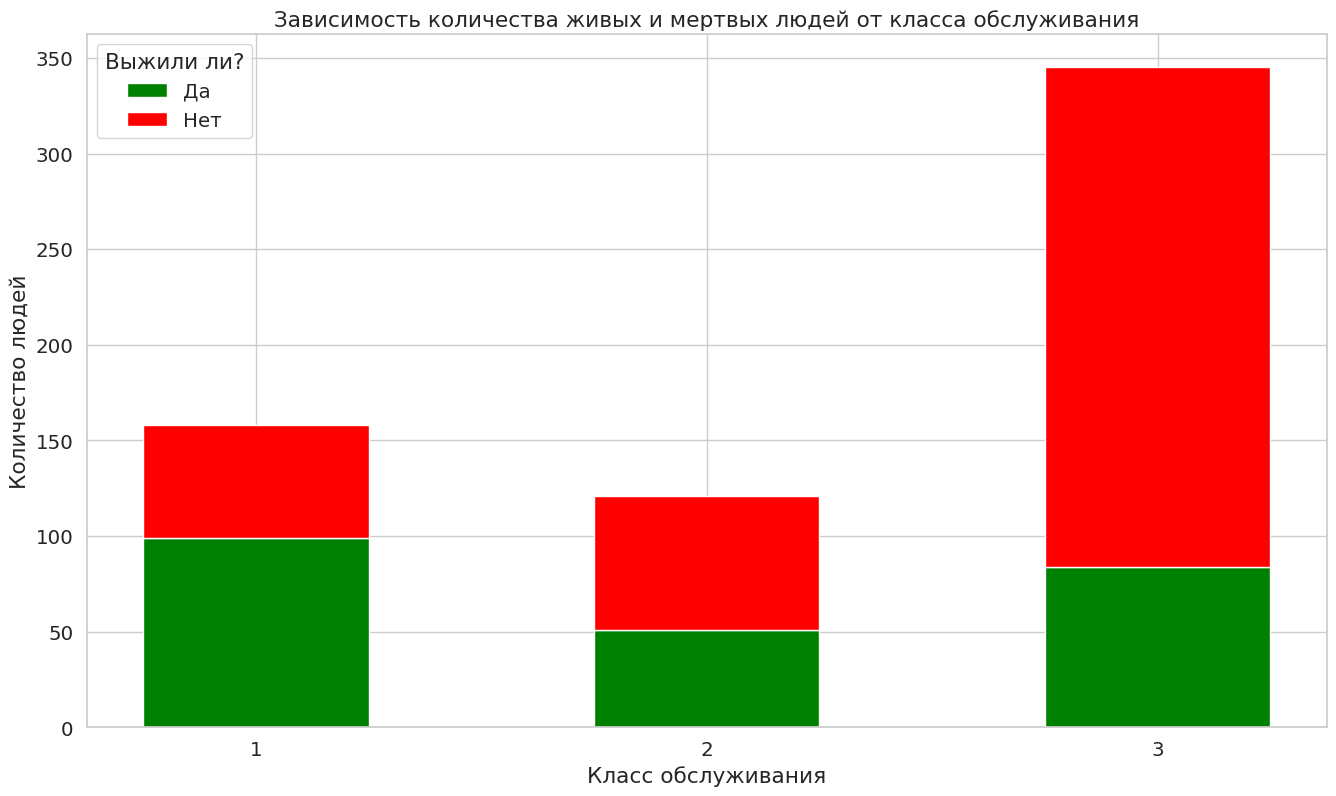

In [197]:
plot_service_statistics = plot_create("Зависимость количества живых и мертвых людей от класса обслуживания", "Класс обслуживания", "Количество людей", ['Survived', 'Dead'])
plot_service_statistics.set_xticks(numpy.arange(1, len(train_classes) + 1, 1, dtype=int))
plot_service_statistics.bar(train_classes, train_alive_count, color='green', width=0.5)
plot_service_statistics.bar(train_classes, train_dead_count,  color='red',   width=0.5, bottom=train_alive_count)
plot_service_statistics.legend(["Да", "Нет"], title="Выжили ли?")
plt.show()

Как мы можем заметить на гистограмме, количество выживших по отношению к общему количеству людей убывает по мере ухудшения класса обслуживания (увеличения номера). Посчитаем коэффициенты выживания, равные отношению количества выжившик к общему количеству людей, в зависимости от класса обслуживания, а затем построим график зависимости коэффициента выживания, равного отношению количества выжившик к общему количеству людей, от класса обслуживания.

Сначала определим вспомогательную функцию, которая будет считать нам коэффициент выживания.

In [198]:
def count_alive_coefficient(cls, data, full): 
  return len(data[data['Pclass'] == cls]) / len(full[full['Pclass'] == cls])

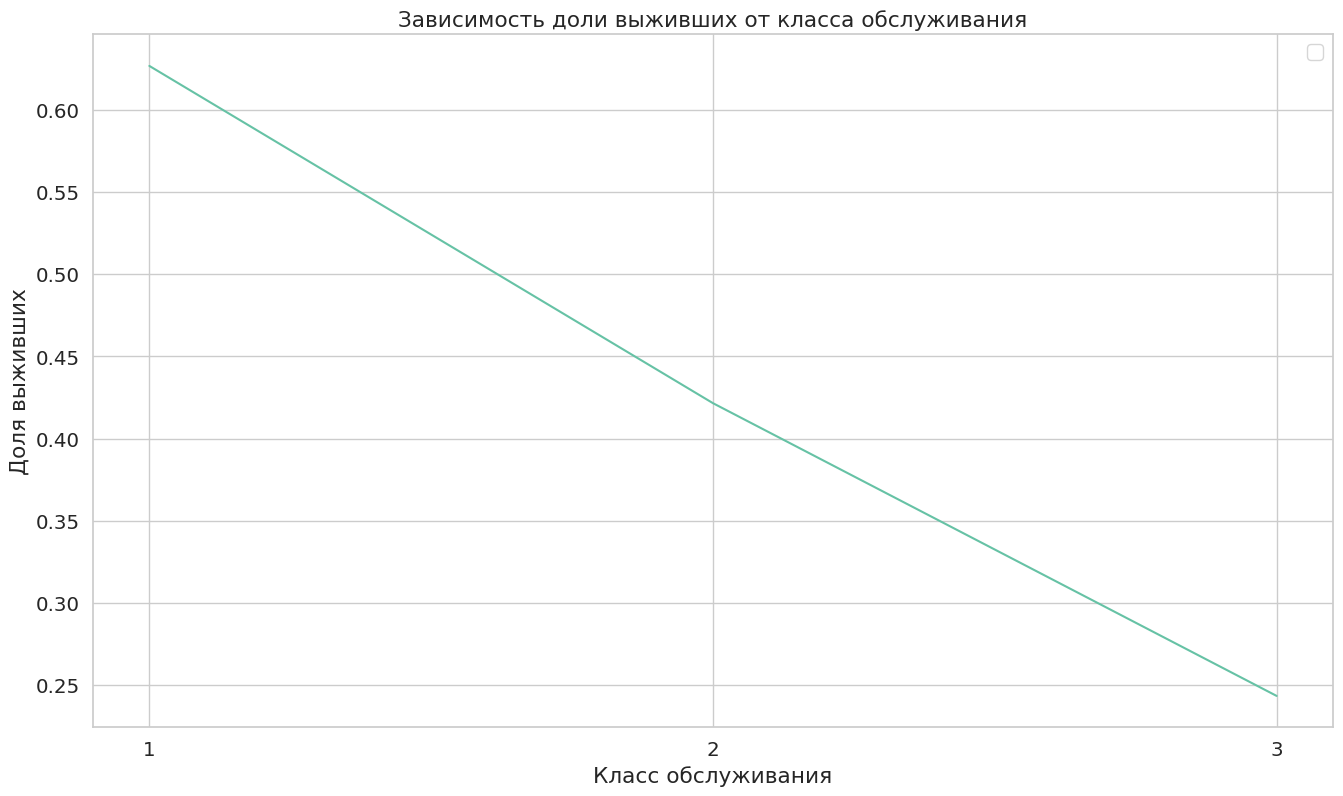

In [199]:
train_alive_coefficient = numpy.vectorize(count_alive_coefficient, excluded=['data', 'full'])(train_classes, data=train_features_alive, full=train_features)

plot_service_coefficient = plot_create("Зависимость доли выживших от класса обслуживания", "Класс обслуживания", "Доля выживших", ['Alive coefficient'])
plot_service_coefficient.set_xticks(numpy.arange(0, len(train_classes) + 1, 1, dtype=int))
plot_service_coefficient.plot(train_classes, train_alive_coefficient)
plt.show()

Как мы можем заметить, коэффициент выживаемости действительно повышается с повышением класса обслуживания (уменьшения его номера). Следовательно, можем сделать предположение о следующей зависимости: 

- **Чем больше номер класса обслуживания, тем меньше процент выживших людей**

##### 2.2 Зависимость выживаемости от пола и класса обслуживания

Рассмотрим теперь зависимость количества погибших и выживших людей от пола и класса обслуживания. Для этого представим ее в виде гистограммы, на которой отдельными столбиками нанесем число человек. Для начала получим информацию о людях в зависимости от их пола и класса обслуживания и посчитаем их количество.

In [200]:
train_alive_male_count   = numpy.vectorize(count_num_in_class, excluded=['data'])(train_classes, data=train_features_alive_male)
train_alive_female_count = numpy.vectorize(count_num_in_class, excluded=['data'])(train_classes, data=train_features_alive_female)
train_dead_male_count    = numpy.vectorize(count_num_in_class,  excluded=['data'])(train_classes, data=train_features_male)   - train_alive_male_count
train_dead_female_count  = numpy.vectorize(count_num_in_class, excluded=['data'])(train_classes, data=train_features_female) - train_alive_female_count

А теперь построим график.

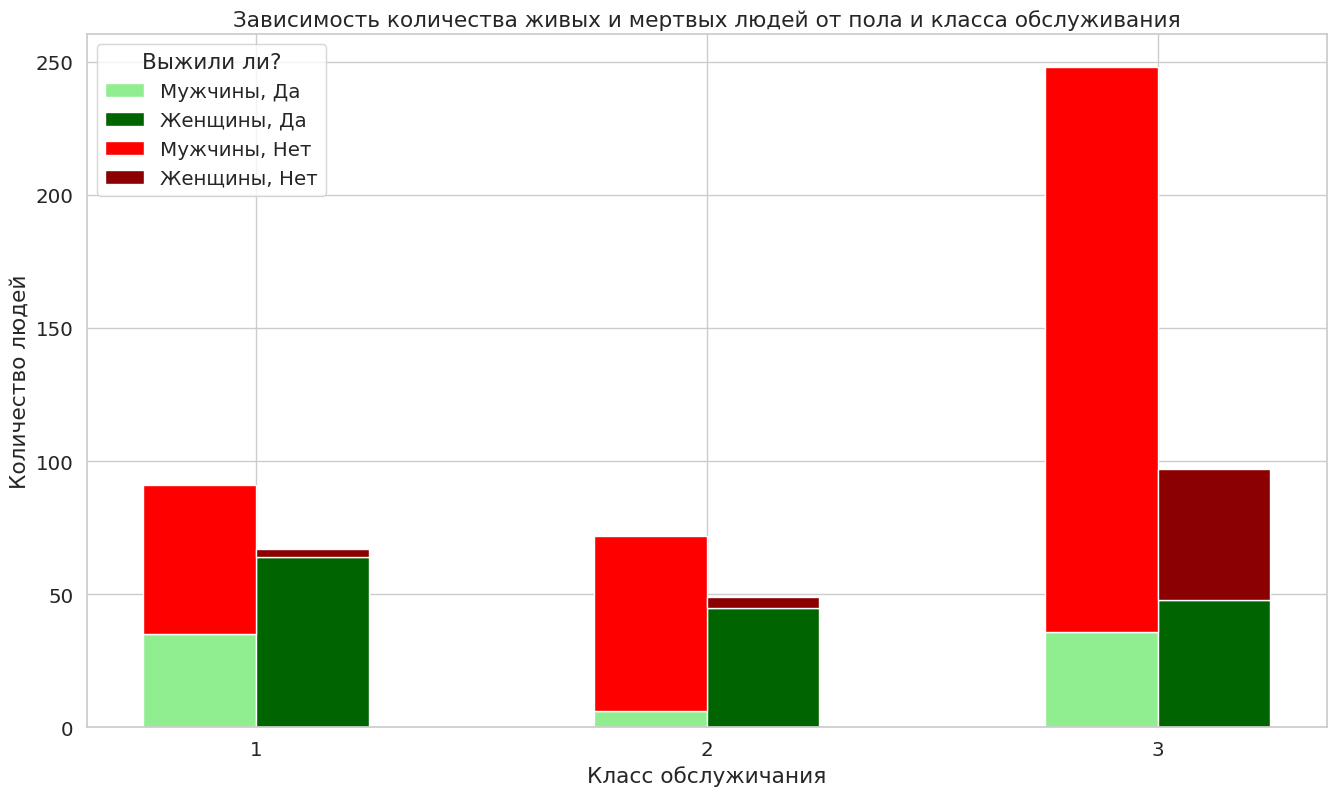

In [201]:
plot_sex = plot_create("Зависимость количества живых и мертвых людей от пола и класса обслуживания", "Класс обслужичания", "Количество людей", ['Male survived', 'Male dead', 'Female survived', 'Female dead'])
plot_sex.set_xticks(numpy.arange(1, len(train_classes) + 1, 1, dtype=int))
plot_sex.bar(train_classes-0.125, train_alive_male_count,   color='lightgreen', width=0.25)
plot_sex.bar(train_classes+0.125, train_alive_female_count, color='darkgreen',  width=0.25)
plot_sex.bar(train_classes-0.125, train_dead_male_count,    color='red',        width=0.25, bottom=train_alive_male_count)
plot_sex.bar(train_classes+0.125, train_dead_female_count,  color='darkred',    width=0.25, bottom=train_alive_female_count)
plot_sex.legend(["Мужчины, Да", "Женщины, Да", "Мужчины, Нет", "Женщины, Нет"], title="Выжили ли?")
plt.show()

Как мы можем заметить на гистограмме, количество выживших женщин по отношению к их общему количеству сильно больше в 1 и 2 классе, чем та же величина, только у мужчин. выживших растет по мере ухудшения класса обслуживания (увеличения номера). Посчитаем коэффициенты выживания, равные отношению количества выжившик к общему количеству людей данного пола соответственно, в зависимости от класса обслуживания.

In [202]:
train_alive_male_coefficient   = numpy.vectorize(count_alive_coefficient, excluded=['data', 'full'])(train_classes, data=train_features_alive_male,   full=train_features_male)
train_alive_female_coefficient = numpy.vectorize(count_alive_coefficient, excluded=['data', 'full'])(train_classes, data=train_features_alive_female, full=train_features_female)

А теперь для наглядности построим график.

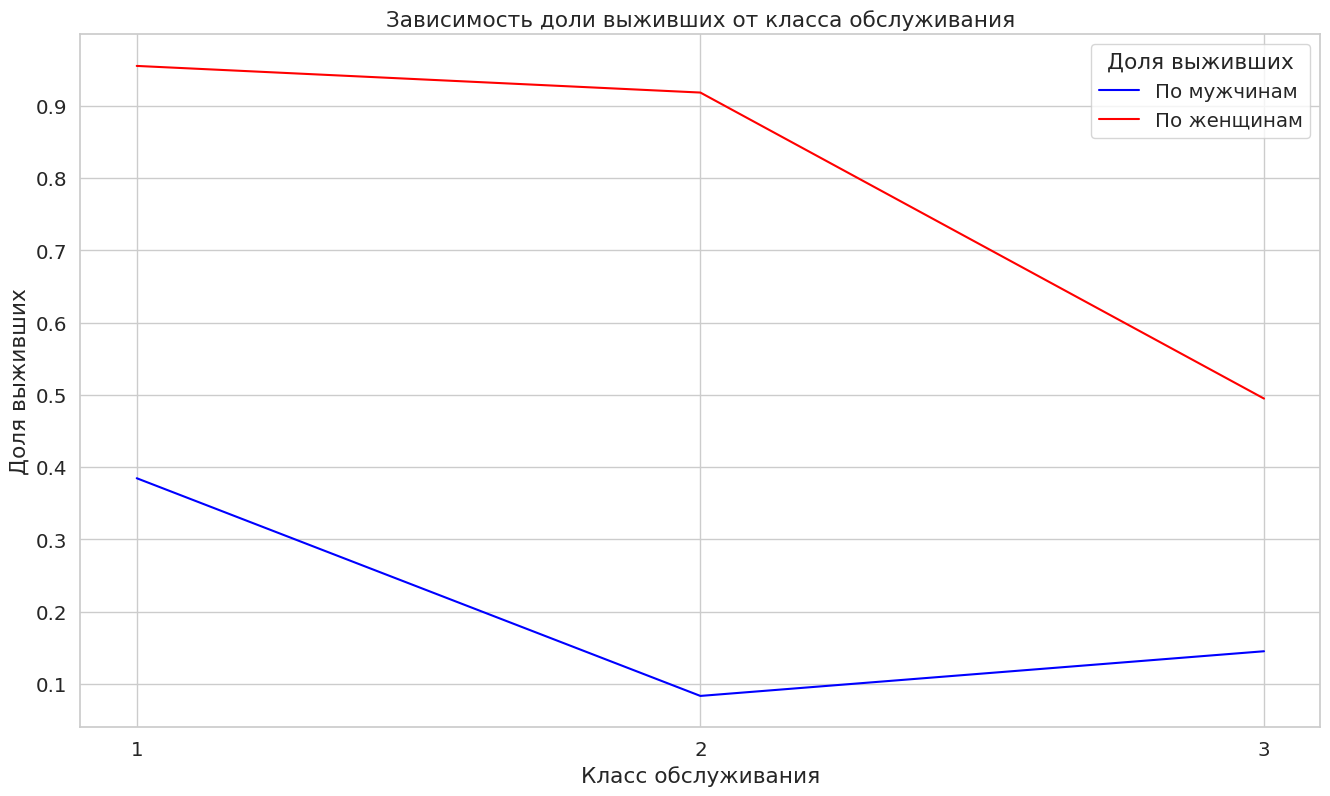

In [203]:
plot_sex_coefficient = plot_create("Зависимость доли выживших от класса обслуживания", "Класс обслуживания", "Доля выживших", ['Alive male coefficient', 'Alive female coefficient'])
plot_sex_coefficient.set_xticks(numpy.arange(0, len(train_classes) + 1, 1, dtype=int))
plot_sex_coefficient.set_yticks(numpy.arange(0, 1.01, 0.1, dtype=float))
plot_sex_coefficient.plot(train_classes, train_alive_male_coefficient,   color='blue')
plot_sex_coefficient.plot(train_classes, train_alive_female_coefficient, color='red')
plot_sex_coefficient.legend(["По мужчинам", "По женщинам"], title="Доля выживших")
plt.show()

Как мы можем заметить из графика, в 1 и 2 классах практически все женщины остались в живых, в то время как в 3 наблюдается сильное повышение их смертности. Для мужчин же функция коэффициента выживаемости имеет более пологую структуру и находится значительно ниже, чем для женщин. Таким образом, мы можем сделать следующие предположения:
- **Мужчины выживали сильно реже женщин**
- **Практически все женщины в элитных классах обслуживания выжили, что нельзя сказать о 3 классе**
- **Для мужчин коэффициент выживаемости монотонно убывает**

##### 2.3 Зависимость выживаемости от возраста и пола

Теперь посмотрим на зависимость количества погибших и выживших людей от возраста и попробуем найти связь. Для этого представим ее в виде графика, где по одной оси будет возраст, а по другой - доля выживших. Будем брать с некоторым диапазоном `EPS` по возрасту каждую точку (например, если мы смотрим на возраст 20 лет, то с ним учитываются еще и те люди, которые имеют возраст от 20 плюс-минус `EPS` лет) на графике и считать количество умерших и всего плававших в данном диапазоне для получения более информативного результата. Это нужно для сглаживания данных: людей с конкретным точным значением возраста, например, может вообще не оказаться. Первые и последние `EPS` точек, соответственно, учитывать не будем в силу некорректности данных (нет отрицательного возраста и данных о более старых).

Определим вспомогательную функцию, которая будет возвращать нам количество людей по возрасту с учетом диапазона `EPS`.

In [204]:
EPS = 5

def sum_range(age, data):
  return numpy.sum(data['counts'][numpy.logical_and(age - EPS <= data['Age'], data['Age'] <= age + EPS)])

Теперь получим информацию о людях в зависимости от их возраста: общую, по мужчинам и по женщинам.

In [205]:
train_age_range       = numpy.vectorize(sum_range, excluded=['data'])(numpy.arange(numpy.max(train_age) + EPS), data=train_age)
train_alive_age_range = numpy.vectorize(sum_range, excluded=['data'])(numpy.arange(numpy.max(train_age) + EPS), data=train_alive_age)
train_age_coefficient = train_alive_age_range / train_age_range

train_male_age_range       = numpy.vectorize(sum_range, excluded=['data'])(numpy.arange(numpy.max(train_male_age) + EPS), data=train_male_age)
train_alive_male_age_range = numpy.vectorize(sum_range, excluded=['data'])(numpy.arange(numpy.max(train_male_age) + EPS), data=train_alive_male_age)
train_male_age_coefficient = train_alive_male_age_range / train_male_age_range

train_female_age_range       = numpy.vectorize(sum_range, excluded=['data'])(numpy.arange(numpy.max(train_female_age) + EPS), data=train_female_age)
train_alive_female_age_range = numpy.vectorize(sum_range, excluded=['data'])(numpy.arange(numpy.max(train_female_age) + EPS), data=train_alive_female_age)
train_female_age_coefficient = train_alive_female_age_range / train_female_age_range

Теперь построим график по имеющимся точкам.

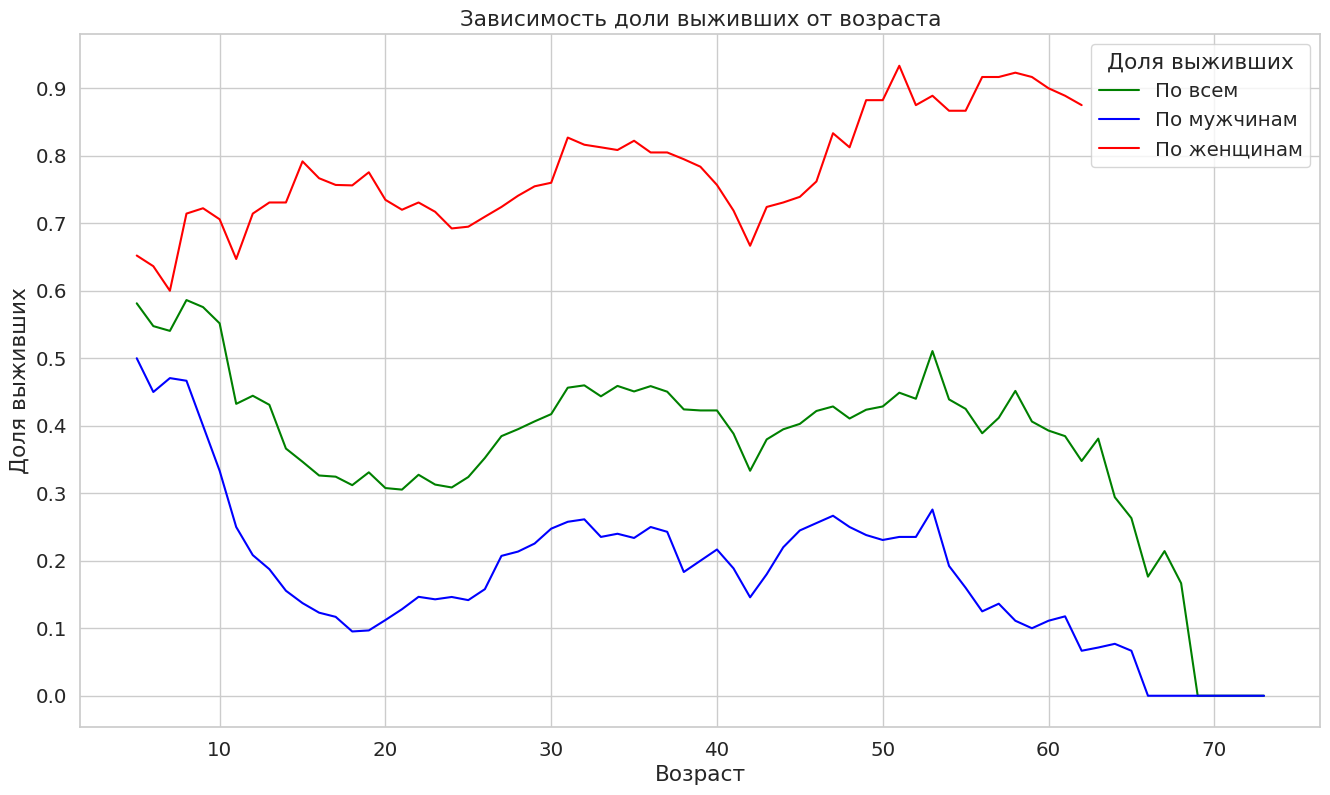

In [206]:
plot_age = plot_create("Зависимость доли выживших от возраста", "Возраст", "Доля выживших", ['Alive coefficient', 'Male alive coefficient', 'Female alive coefficient'])
plot_age.set_xticks(numpy.arange(0, 100, 10, dtype=int))
plot_age.set_yticks(numpy.arange(0, 1.01, 0.1, dtype=float))
plot_age.plot(numpy.arange(EPS, len(train_age_range)        - EPS), train_age_coefficient[EPS:-EPS],        color='green')
plot_age.plot(numpy.arange(EPS, len(train_male_age_range)   - EPS), train_male_age_coefficient[EPS:-EPS],   color='blue')
plot_age.plot(numpy.arange(EPS, len(train_female_age_range) - EPS), train_female_age_coefficient[EPS:-EPS], color='red')
plot_age.legend(["По всем", "По мужчинам", "По женщинам"], title="Доля выживших")
plt.show()

Построим так же гистограмму, чтобы убедиться в результате. Гипотеза: **смертность у младенцев меньше.**

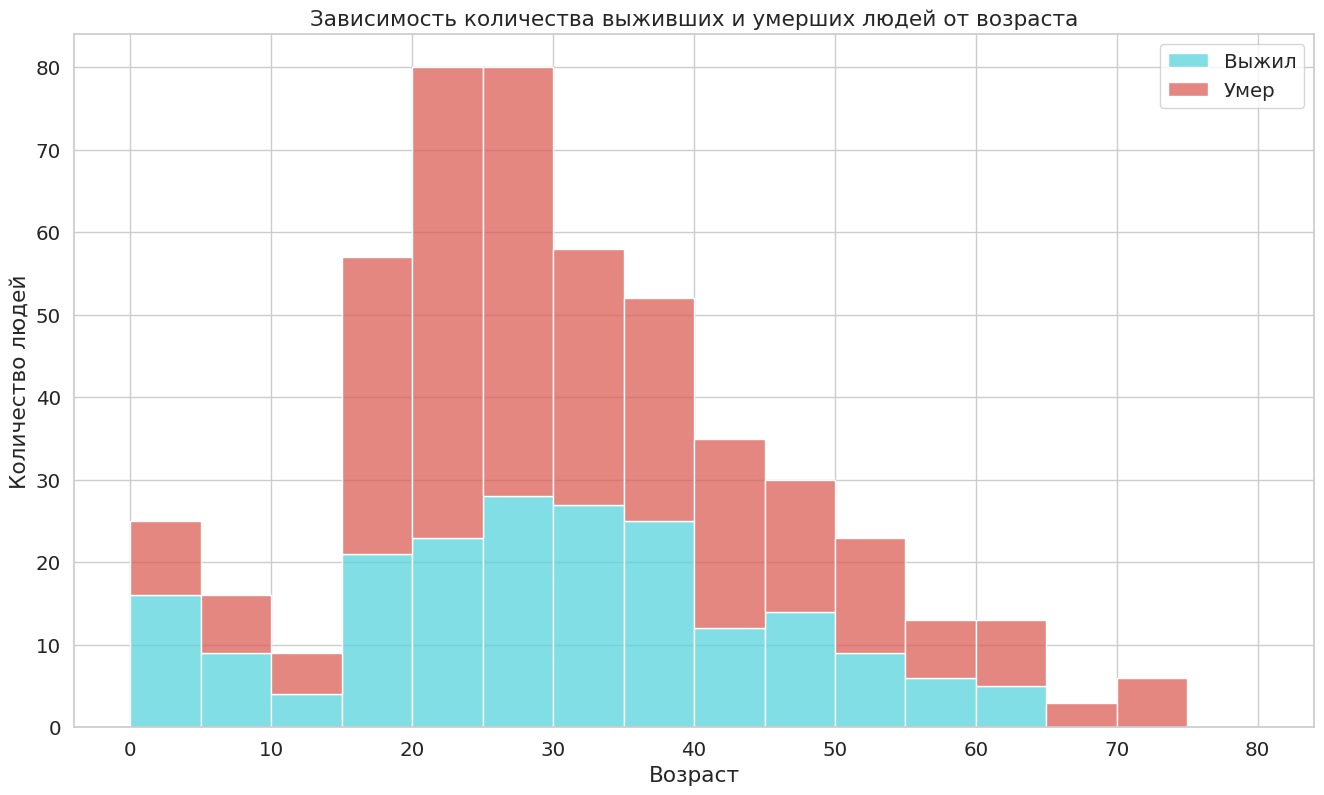

In [207]:
plt.figure(figsize=(16,9))
plot_age_gistogram = seaborn.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', palette='hls', bins=numpy.linspace(0, 80, 17))
plot_set_info("Зависимость количества выживших и умерших людей от возраста", "Возраст", "Количество людей", ['Выжил', 'Умер'])
plt.show()

Из графиков мы можем сделать вывод, что наименьшаяя смертность действительно у младенцев (исходя из высот гистограмм и графика). При этом однозначную зависимость для мужчин и женщин мы провести не можем.

##### 2.4 Зависимость выживаемости от количества братьев, сестер, родителей, детей и супруга

Теперь посмотрим на зависимость количества погибших и выживших людей от вышеперечисленных параметров. Для этого построим тепловую диаграмму, на которой по вертикальной оси будет количество родителей и детей, а по горизонтальной - сумма количества супругов, братьев и сестер, а цвет будет эквивалентен коэффициенту выживаемости.

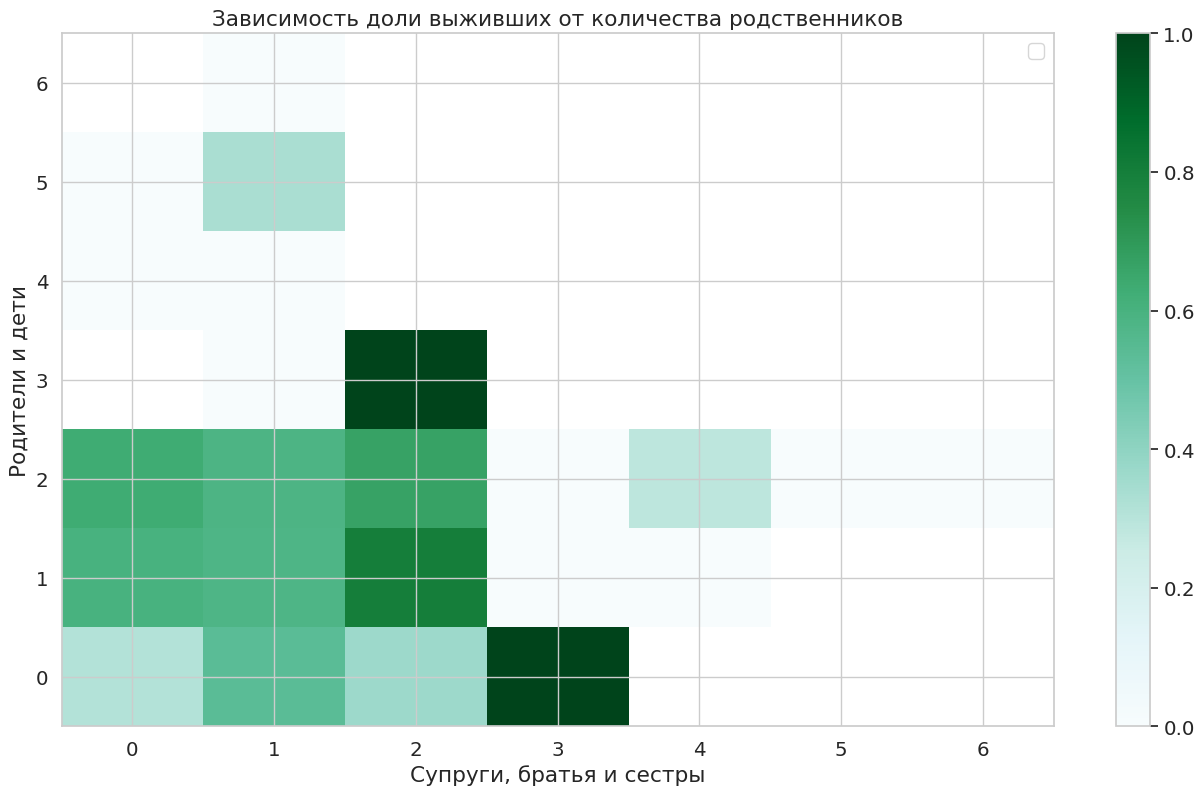

In [208]:
survival_rate = train_data.pivot_table(index='Parch', columns='SibSp', values='Survived')

plt.figure(figsize=(16,9))
plot_set_info("Зависимость доли выживших от количества родственников", "Супруги, братья и сестры", "Родители и дети", [])
plt.colorbar(plt.imshow(survival_rate, aspect='auto', cmap='BuGn', origin='lower'))
plt.show()

Исхоодя из графика можно заметить, что если общая сумма родственников лежит в диапазоне от 1 до 3, то шанс выжить у такого человека был больше (прямые y = 1 - x, 2 - x и 3 - x на графике). Впрочем, такая зависимость непостоянна и имеет погрешность, а потому сделать точный вывод о ее существовании на данный момент нельзя.

##### 2.5 Зависимость выживаемости от стоимости проезда.

Теперь посмотрим на зависимость количества погибших и выживших людей от стоимости, которую они заплатили за проезд. Аналогично: стоимость будем брать с небольшим диапазоном для получения более точного результата.

Следующая диаграмма иллюстрирует зависимость количества выживщих и умерших людей от стоимости билета.

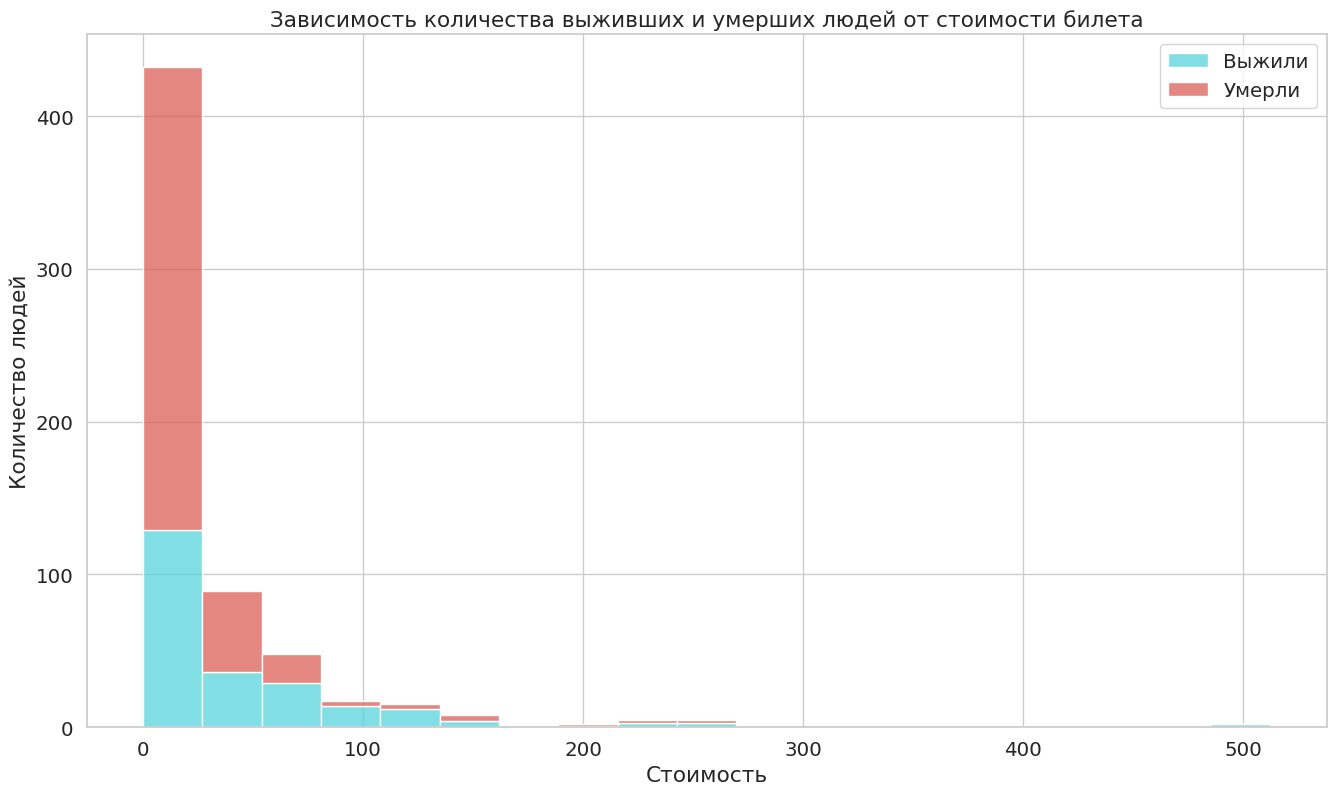

In [209]:
plt.figure(figsize=(16,9))
plot_fare = seaborn.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack', palette='hls', bins=numpy.linspace(0, numpy.max(train_data['Fare']), 20))
plot_set_info("Зависимость количества выживших и умерших людей от стоимости билета", "Стоимость", "Количество людей", ['Выжили', 'Умерли'])
plt.show()

Рассмотрим часть графика с высокой стоимостью ближе (на текущем она не очень информативна).

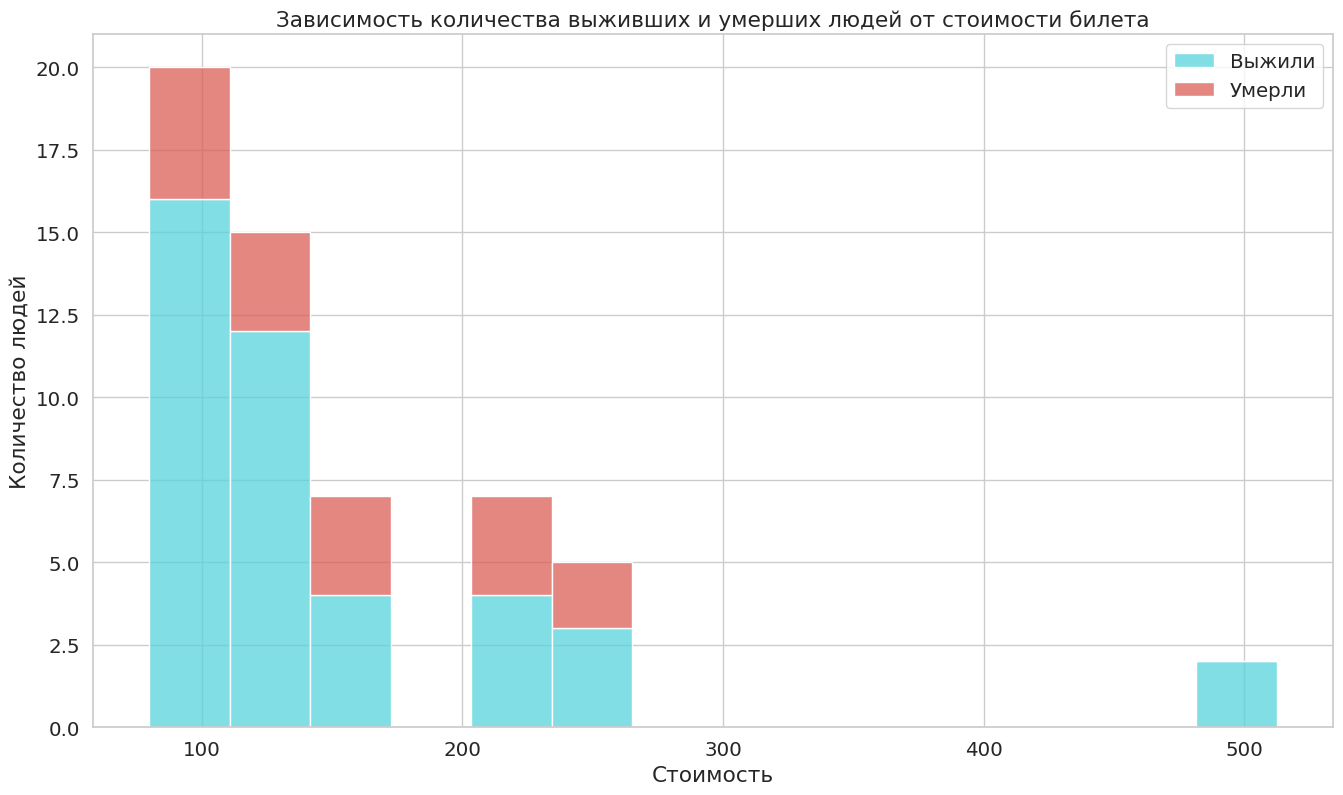

In [210]:
plt.figure(figsize=(16,9))
plot_fare_scaled = seaborn.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack', palette='hls', bins=numpy.linspace(80, numpy.max(train_data['Fare']), 15))
plot_set_info("Зависимость количества выживших и умерших людей от стоимости билета", "Стоимость", "Количество людей", ['Выжили', 'Умерли'])
plt.show()

Как мы можем заметить из последних двух графиков, люди, заплатившие за билет большую сумму, умирают реже (высоты гистограм живых больше). Скорее всего, существует зависимость между стоимостью билета и классом обслуживания.

Проверим гиптезу графически. Для начала определим вспомогательную функция, которая будет считать среднюю стоимость билета по классу.

In [211]:
def get_mean_fares(cls, data):
  return numpy.mean(data[data['Pclass'] == cls]['Fare'])

А теперь построим сам график зависимости средней стоимости билета от класса.

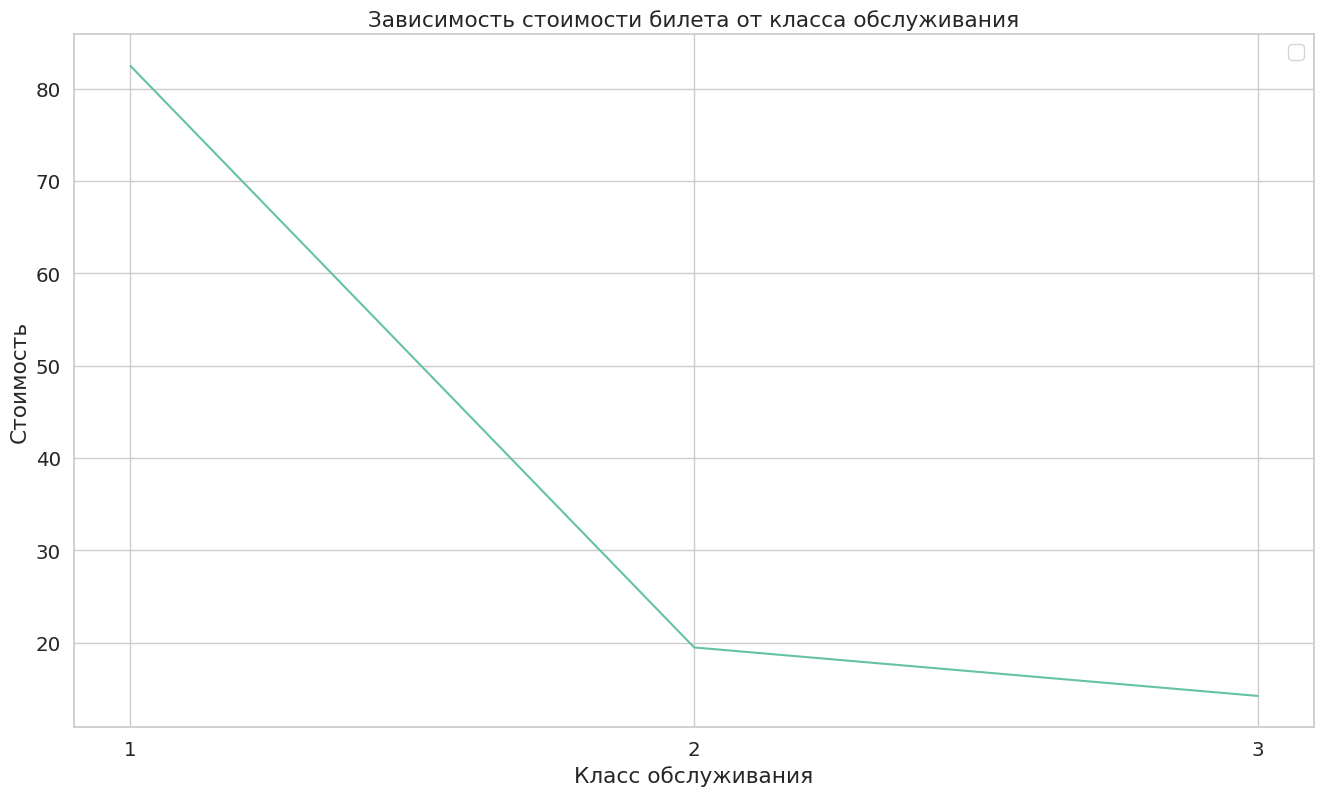

In [212]:
mean_fares = numpy.vectorize(get_mean_fares, excluded=['data'])(train_classes, data=train_features)

plot_fare = plot_create("Зависимость стоимости билета от класса обслуживания", "Класс обслуживания", "Стоимость", ['Mean fare'])
plot_fare.set_xticks(numpy.arange(0, len(train_classes) + 1, 1, dtype=int))
plot_fare.plot(train_classes, mean_fares)
plt.show()

Как мы можем видеть, стоимость первого класса сильно выше стоимости остальных. Следовательно, гипотеза о существовании зависимости между стоимостью и классом подтверждается данными, а значит, существует и зависимость между стоимостью билета и кожффициентом выживания:
- **Чем выше стоимость, тем выше шанс выжить**

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

Нам так же необходимо ввести коэффициенты, с которыми мы будем учитывать наши параметры при поиске метрики в алгоритме ближайших соседей, так как разные параметры мы можем учитывать с разными весами для достижения наилучшей точности результата. 
Создадим вспомогательную функцию `knn_get`, которая будет возвращать `k` ближайших соседей, с помощью которых мы будем получать данные в исходной функции поиска наиболее часто встречающегося значения целевого признака. 
Почему функция поиска `k` ближайших соседей выглядит именно так (зачем я заполняю нулями расстояния, которые получились не числами) - объяснено ниже в информации о подготовке данных и том, что необходимо сделать с признаками.

Принцип работы - идентичен тому, что было в контесте: считаю разности расстояний по осям с помощью привода к трехмерным матрицам, перемножаю на себя, чтобы получить квадраты расстояний, затем зануляю неизвестные значения (те, которые не были известны в исходной выборке и в итоге дали `NaN`, чтобы не портить получившийся результат и для данной точки учитывать только оставшиеся метрики), затем суммирую расстояния пов сем осям для пар точек и беру только `k` ближайших.

In [213]:
def knn_get(features, train_features, k):
    '''
    Находит K ближайших соседей для features из train_festures
    '''
    
    distances = (features[numpy.newaxis, :, :] - train_features[:, numpy.newaxis, :]) ** 2
    distances[numpy.isnan(distances)] = 0
    distances = distances.sum(axis=2)
    return numpy.argsort(distances, axis=0)[:k].T

Определим вспомогательную функцию, которая будет возвращать наиболее часто встречающееся значение в массиве

In [214]:
def get_unique(data):
  values, counts = numpy.unique(data, return_counts=True)
  return values[numpy.argmax(counts)]

Теперь реализуем саму функцию поиска ответа по k ближайшим соседям, после чего мы будем готовы обрабатывать данные и строить классификатор.

In [215]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    
    knn_array = knn_get(features[['Age', 'Fare']].to_numpy(), train_features[['Age', 'Fare']].to_numpy(), k)
    survived = numpy.apply_along_axis(get_unique, 1, train_target.to_numpy()[knn_array]).ravel()
    return features.assign(Survived=survived)

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

- Метрика будет равна квадрату расстояний (как взвешенное расстояние до соседа), домноженному на коэффициенты $A$ и $F$, то есть, формула $A \cdot (age_{point} - age_{current})^2 + F \cdot (fare_{point} - fare_{current})^2$. Предварительно нам необходимо посмотреть, какие у нас есть признаки и какие оптимальные коэффициенты мы из них можем получить. Для этого воспользуемся построением графиков.
- Нам необходимо обработать неизвестные значения возрастов. Для этого просто выкинем их из тренировочного датасета, так как классификация с использованием точек, для которых у нас недостаточно данных, не точна.
- Для тестового датасета заменим все неизвестные метрики на 0 (так как в случае неопределенности у нас тогда метрика будет считаться только по оставшимся известным параметрам и, следовательно, предсказание будет делаться только по ним и мы не будем учитывать неизвестные значения). Это преобразование необходимо сделать в функции поиска ближайших соседей: после подсчета расстояний заменить неизвестные на 0.

Построим график зависимости стоимости билета от возраста.

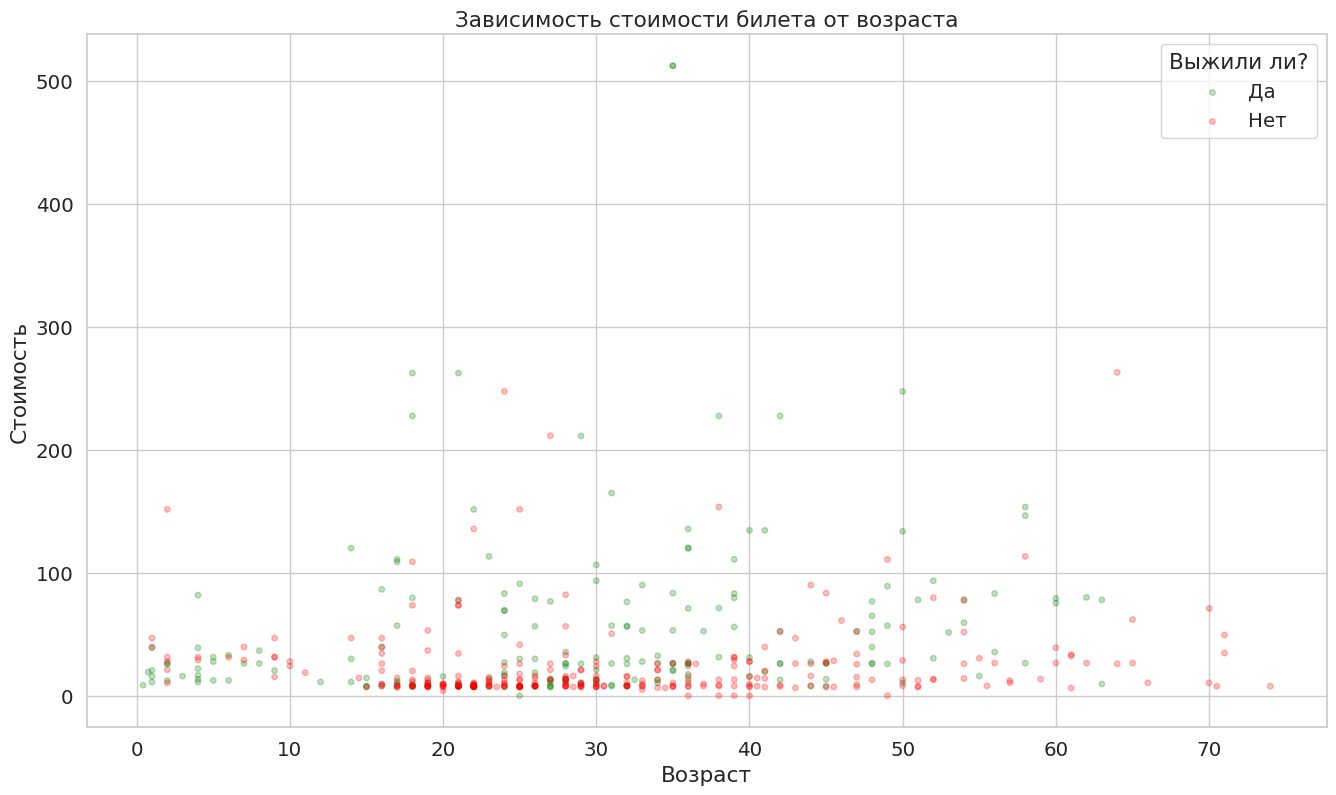

In [216]:
plot_age_fare = plot_create("Зависимость стоимости билета от возраста", "Возраст", "Стоимость", ['Alive', 'Dead'])
plot_age_fare.scatter(train_features_alive_age['Age'], train_features_alive_age['Fare'], s=numpy.full(len(train_features_alive_age), 16), c='green', alpha=0.25)
plot_age_fare.scatter(train_features_dead_age['Age'],  train_features_dead_age['Fare'],  s=numpy.full(len(train_features_dead_age),  16), c='red',   alpha=0.25)
plot_age_fare.legend(["Да", "Нет"], title="Выжили ли?")
plt.show()

Снова рассмотрим гистограмму зависимости количества пассажиров от возраста.

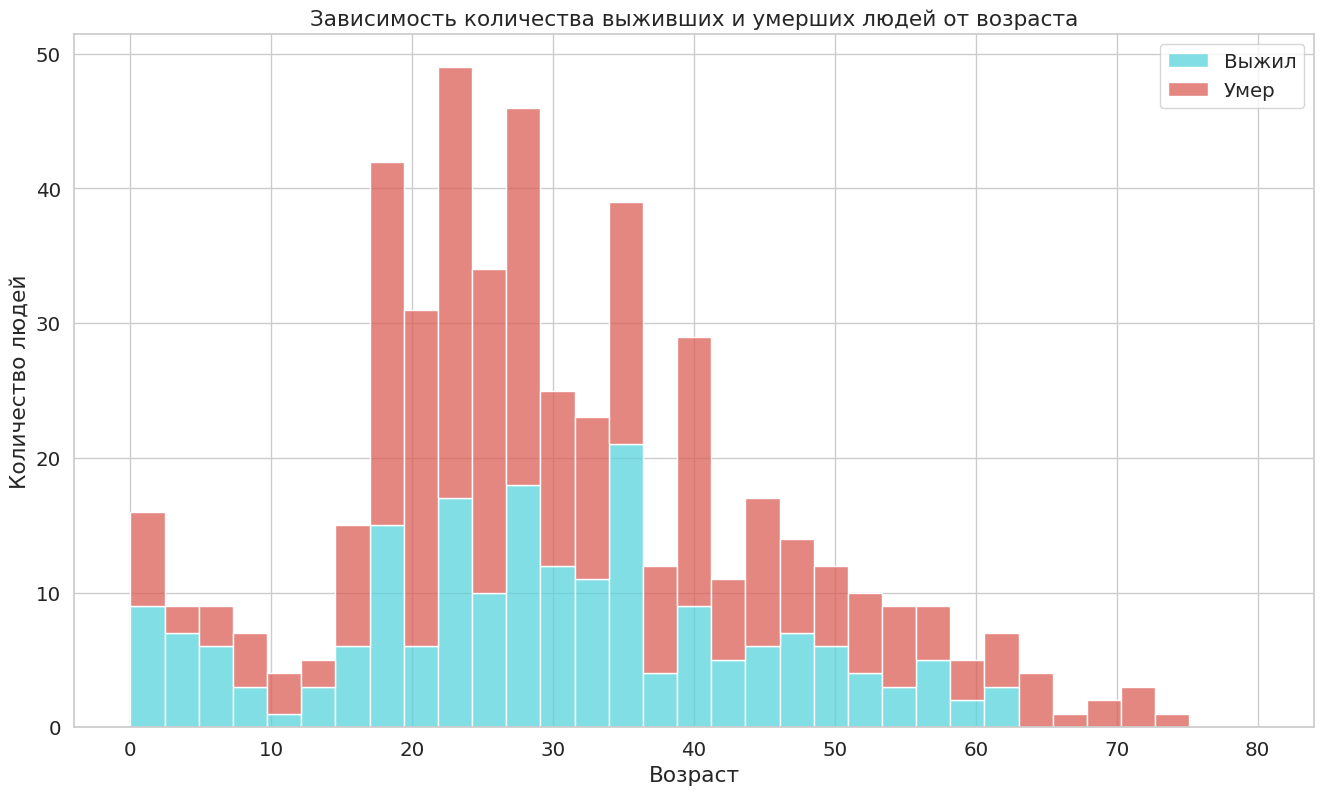

In [217]:
plt.figure(figsize=(16,9))
plot_age_gistogram = seaborn.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', palette='hls', bins=numpy.linspace(0, 80, 34))
plot_age_gistogram.set_title("Зависимость количества выживших и умерших людей от возраста")
plot_age_gistogram.set_xlabel("Возраст")
plot_age_gistogram.set_ylabel("Количество людей")
plot_age_gistogram.legend(['Выжил', 'Умер'])
plt.show()

А теперь снова расмотрим гистограмму зависимости количества пассажиров от стоимости билета.

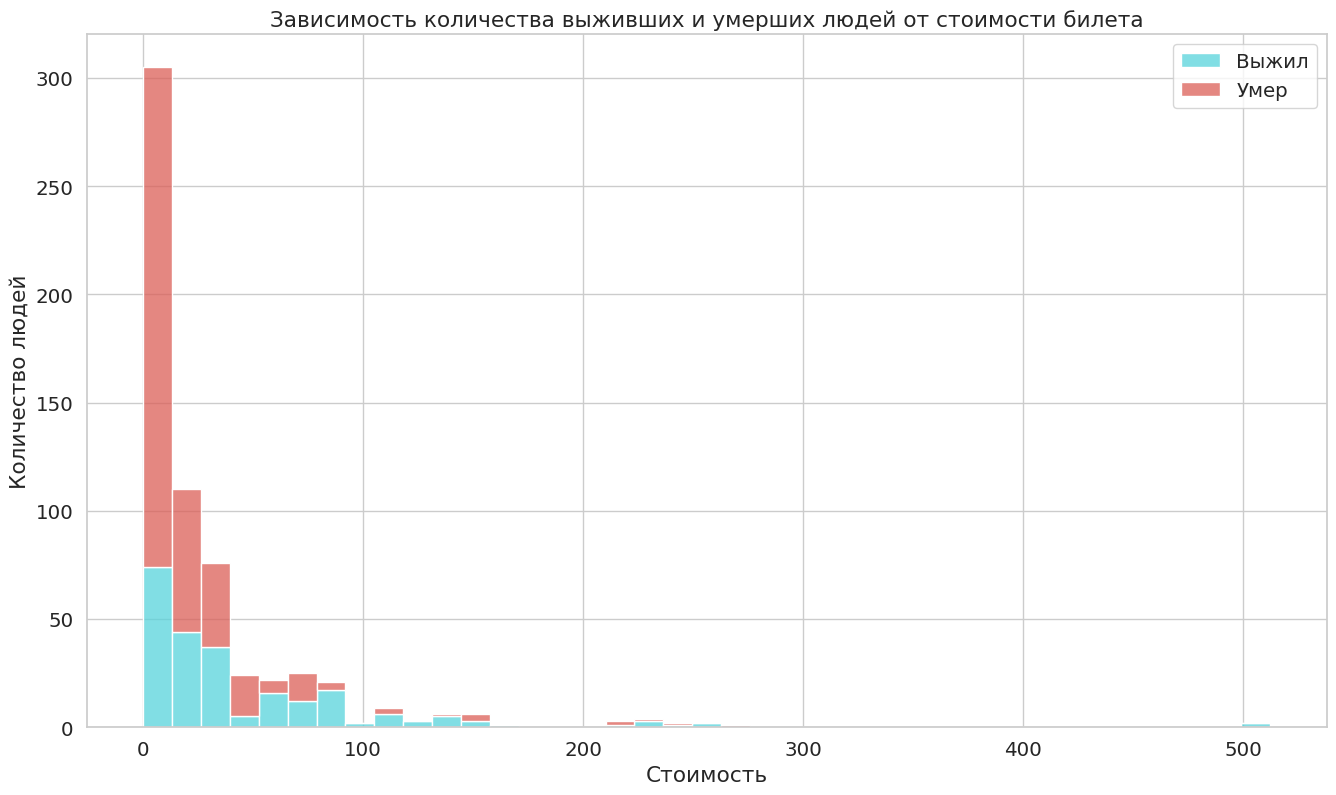

In [218]:
plt.figure(figsize=(16,9))
plot_fare = seaborn.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack', palette='hls', bins=numpy.linspace(0, numpy.max(train_data['Fare']), 40))
plot_fare.set_title("Зависимость количества выживших и умерших людей от стоимости билета")
plot_fare.set_xlabel("Стоимость")
plot_fare.set_ylabel("Количество людей")
plot_fare.legend(['Выжил', 'Умер'])
plt.show()

Из гистограмм видно, что большинство людей имеют стоимость билета `Fare` менее `100`, а большинство возрастов `Age` менее `65`.  
Теперь нормируем значения, использовав данные коэффициены (поделив на них значения данных).

Определим функцию нормировки и получения данных из датасета.

In [219]:
def data_prepare(data, features, coefficients):
    features_prepared = data[features] / coefficients
    target_prepared   = data[target_column]
    return features_prepared, target_prepared

Теперь определим функцию подсчета точности в зависимости от количества соседей и коэффициентов метрики (в данном случае `F` и `A`).

In [220]:
def get_accuracy(k: int, coefficients: list) -> float:
    '''
    Считает точность предсказания: сначала подготавливает данные, выкидывая из тренировочных неизвестные точки, затем нормирует, а потом с помощью knn получает результат.
    '''
    
    features = ['Age', 'Fare']
    train_data_dropped = train_data.dropna(subset=features)
    train_features_prepared, train_target_prepared = data_prepare(train_data_dropped, features, coefficients)
    test_features_prepared, test_target_prepared = data_prepare(test_data, features, coefficients)
    
    knn_results = knn(test_features_prepared, train_features_prepared, train_target_prepared, k)
    return (knn_results['Survived'] == test_target_prepared).sum() / len(test_target_prepared)

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

- Посчитаем точность и построим график зависимости точности от количества учитываемых соседей.

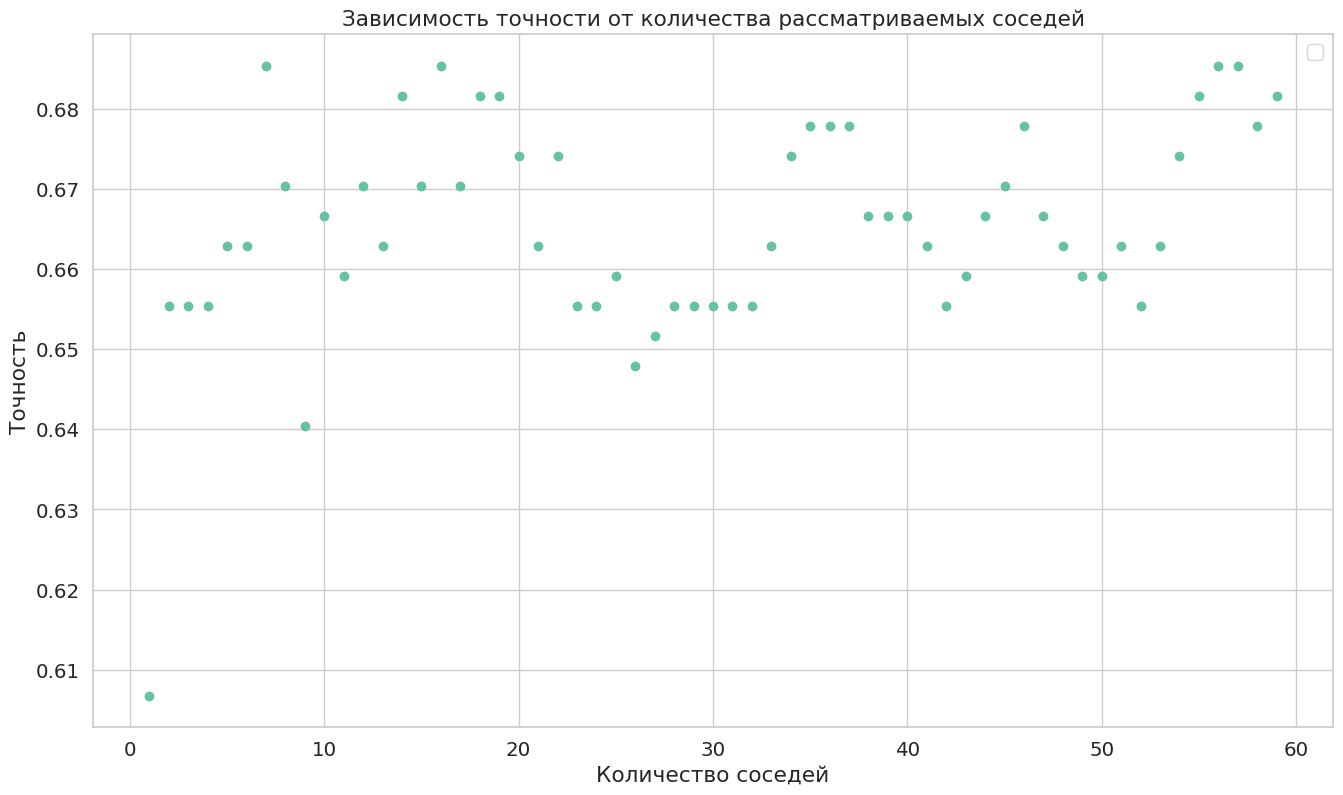

In [221]:
MAX_NEIGHBOURS = 60

accuracy = numpy.vectorize(get_accuracy, excluded=['coefficients'])(numpy.arange(1, 60), coefficients=[65, 100])

plot_age = plot_create("Зависимость точности от количества рассматриваемых соседей", "Количество соседей", "Точность", ['Accuracy'])
plot_age.scatter(numpy.arange(1, MAX_NEIGHBOURS), accuracy)
plt.show()

In [222]:
print(f"Наибольшее значение точности достигается при количестве соседей K = {accuracy.argmax()}.")
print(f"Как мы видим из графика, довольно хорошая точность достигается при K \u2208 [{numpy.argmax(accuracy > numpy.average(accuracy))}, {len(accuracy) - numpy.argmax(numpy.flip(accuracy) > numpy.average(accuracy))}].")

Наибольшее значение точности достигается при количестве соседей K = 6.
Как мы видим из графика, довольно хорошая точность достигается при K ∈ [6, 59].


Если же уменьшать количество учитываемых соседей, то точность падает, то есть при малых она чуть хуже. Это можно объяснить неоднородностью данных.

Теперь применим метод поиска оптимальных значений `A` и `F` путем перебора. Заметим, что нам важно только соотношение между ними в силу того, что мы ищем именно ближайших соседей, а не расстоянеи до них. То есть, неважно домножение всей метрики на коэффициент. Найдем такое соотношение, при котором максимальная точность наибольшая. Пусть $ C =\frac{F}{A}$

Для начала создадим функцию, которая будет нам возвращать массив точностей для всевозможных `K` при фиксированном коэффициенте `C`.

In [223]:
def get_accuracy_by_coefficient(coefficients) -> float:
  return numpy.vectorize(get_accuracy, excluded=['coefficients'])(numpy.arange(1, MAX_NEIGHBOURS), coefficients=coefficients)

Теперь построим Data Frame для всевозможных значений коэффициента и количества соседей и получившихся при этом точностей.

In [224]:
def get_accuracy_data(max_log):
    '''
    Получает DataFrame из данных о коэффициенте, количестве соседей и соответствующей им точности
    coefficient_pairs - всевозможные рассматриваемые коэффициенты
    accuracy - получившиеся значения точности
    '''
    
    division = 2.0 ** numpy.arange(-max_log, max_log)
    coefficient_pairs = numpy.c_[numpy.ones(len(division)), numpy.array(division)]
    accuracy = numpy.apply_along_axis(get_accuracy_by_coefficient, 1, coefficient_pairs)
    return pandas.DataFrame({'Coefficient': numpy.repeat(division, MAX_NEIGHBOURS - 1), 
                             'Neighbours': numpy.tile(numpy.arange(1, MAX_NEIGHBOURS), 2 * max_log), 
                             'Accuracy': accuracy.ravel()})

Визуализируем это с помощью тепловой карты.

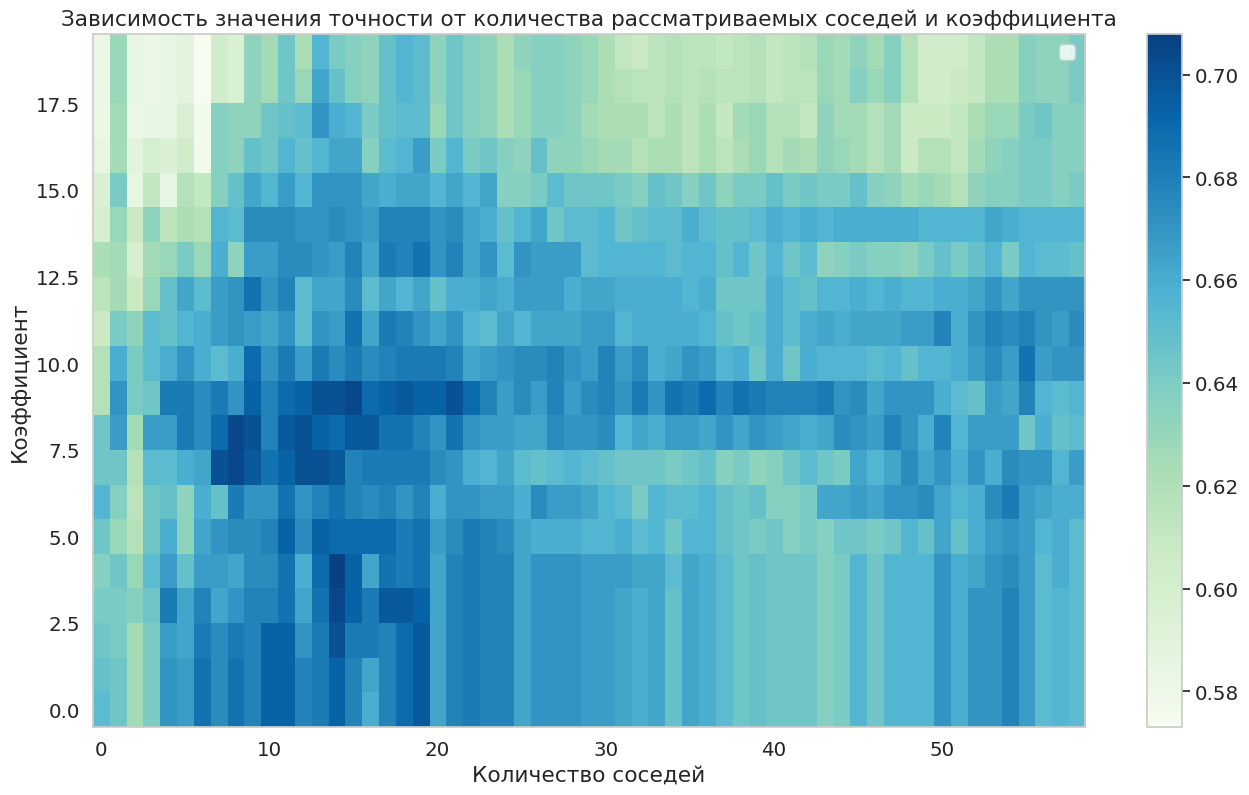

In [225]:
accuracy_data = get_accuracy_data(10)
accuracy_table = accuracy_data.pivot_table(index='Coefficient', columns='Neighbours', values='Accuracy')

plt.figure(figsize=(16,9))
plot_set_info("Зависимость значения точности от количества рассматриваемых соседей и коэффициента", "Количество соседей", "Коэффициент", [])
plt.grid(False) 
plt.colorbar(plt.imshow(accuracy_table, aspect='auto', cmap='GnBu', origin='lower').axes.grid(False))
plt.show()

И найдем максимальный результат:

In [226]:
optimal_index = accuracy_data['Accuracy'].argmax()
optimal_values = {'Coefficient': accuracy_data['Coefficient'][optimal_index], 'Neighbours': accuracy_data['Neighbours'][optimal_index]}
print(f"Наибольшее значение точности достигается при коэффициенте C = {optimal_values['Coefficient']:.2} и количестве соседей K = {optimal_values['Neighbours']}")

Наибольшее значение точности достигается при коэффициенте C = 0.016 и количестве соседей K = 15


Заметим, что оптимальные значения коэффициента метрики и количества учитываемых ближайших соседей лежат в следующих диапазонах:
- $C \in [8, 13]$
- $K \in [7, 30]$

Заметим, что количество соседей `K`, которое мы получили первым способом, пересекает диапазон по `K`, который мы получили вторым способом

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

- Можно учесть тем же способом, что и эти два признака: считать метрику и находить k ближайших соседей. Проблемы:
  - Данные неоднородны. Следовательно, может возникнуть такая же проблема с тем, какую метрику для этих данных использовать для того, чтобы повысить точность и нормализовать значения.
  - Время работы. Чем больше параметров, тем дольше работа.
  - Чем больше параметров, тем больше степеней свободы, то есть, будет склонность к переобучению: мы можем слишком получить слишком хороший результат для тренировочной выборки, который в силу большего количества переменных не будет подходить для тестовой
  - Метрика на больших степенях свободы может давать не точные результаты: в шар ближайших точек может попасть маленькое количество из другого класса, в то время как множество других будет лежать на границе и предсказание будет неверным.
- Можно было бы сделать поиски ближайших соседей с совпадающими некоторыми другими признаками: например, считать расстояние для женщин только до женщин и так же для мужчин. Или аналогично с классами обслуживания: для них считать отдельно. Проблемы:
  - Уменьшается количество тренировочных данных, сужается выборка.

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

Реализуйте полученные деревья по шаблону

Определим функцию, которая по информации о человеке будет решать, выжил он или нет (само дерево).

**Дерево 1:**

Правила:
  - Если класс обслуживания равен 3, то:
    - Если возраст меньше либо равен 10, то **выжил**
    - Иначе: **умер**
  - Если класс обслуживания равен 2, то:
    - Если пол женский, то **выжил**
    - Иначе - **умер**
  - Если класс обслуживания раввен 1, то:
    - Если пол женский, то **выжил**
    - Если возраст мерьше либо равен 10, то **выжил**
    - Иначе - **умер**    

In [227]:
def tree_1_apply(row):
  '''
  Принцип работы дерева описан выше
  '''
  
  if row['Pclass'] == 3:
    if row['Age'] <= 10:
      return 1
    else:
      return 0
  elif row['Pclass'] == 2:
    if row['Sex'] == 'female':
      return 1
    else:
      return 0
  else:
    if row['Sex'] == 'female':
      return 1
    elif row['Age'] <= 10:
      return 1
    else:
      return 0
  

А теперь тело функции дерева принятия решений.

In [228]:
def tree_1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predict = features.apply(tree_1_apply, axis=1)
    return features.assign(Survived=predict.to_numpy())

**Дерево 2:**

Правило: женщины выжили, а мужчины - нет.

In [229]:
def tree_2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predict = features['Sex'].apply(lambda sex: 0 if sex == 'male' else 1)
    return features.assign(Survived=predict.to_numpy())

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Точность, то есть, процент верно данных ответов на тестовой выборке данных.

Реализуйте данный критерий по шаблону

In [230]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    
    return (target == predicted).sum() / len(target)

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [231]:
print(f"Точность дерева глубины 2 (первого дерева): {criteria(test_target, tree_1(test_features)['Survived']):.2}")
print(f"Точность дерева глубины 1 (второго дерева): {criteria(test_target, tree_2(test_features)['Survived']):.2}")
print(f"Точность алгоритма K ближайших соседей: {get_accuracy(optimal_values['Neighbours'], [1, optimal_values['Coefficient']]):.2}")

Точность дерева глубины 2 (первого дерева): 0.77
Точность дерева глубины 1 (второго дерева): 0.79
Точность алгоритма K ближайших соседей: 0.71


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

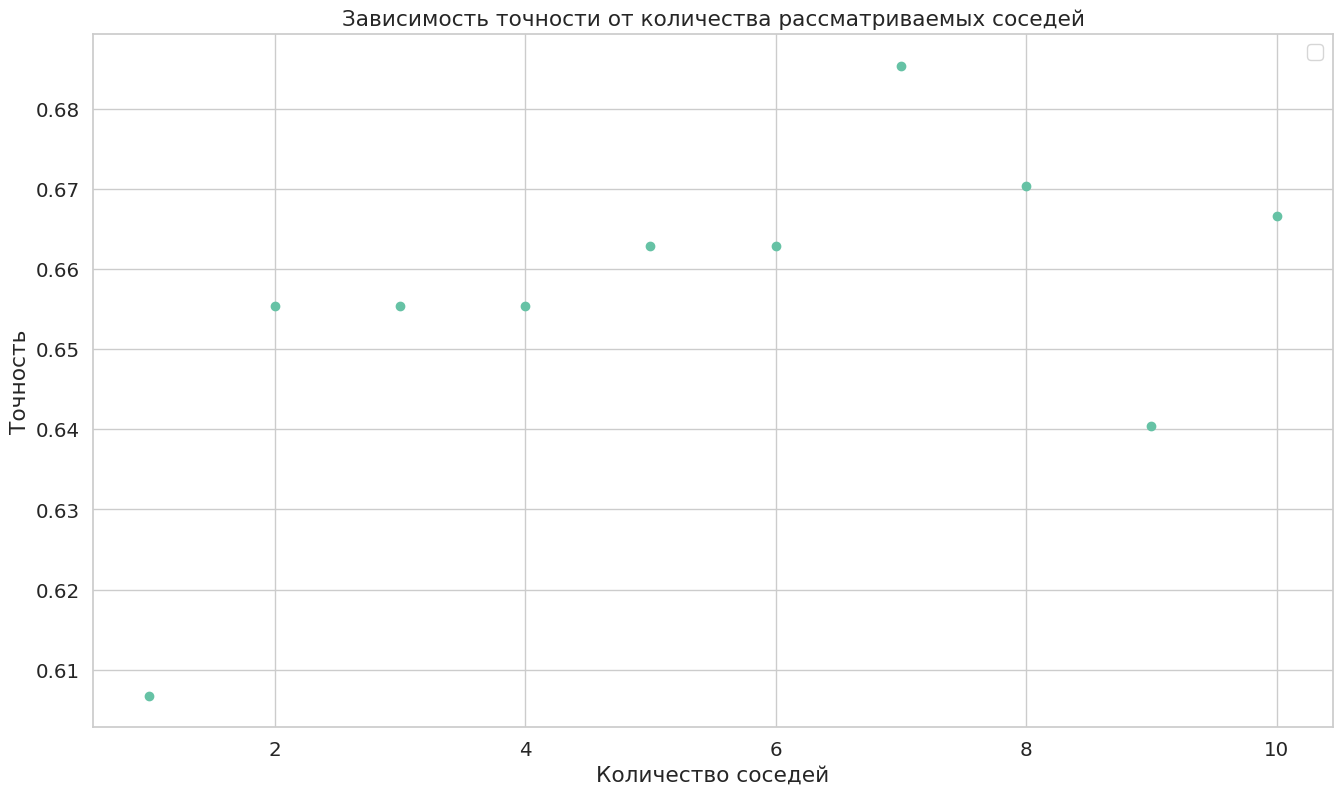

In [232]:
accuracy = numpy.vectorize(get_accuracy, excluded=['coefficients'])(numpy.arange(1, 11), coefficients=[65, 100])

plot_age = plot_create("Зависимость точности от количества рассматриваемых соседей", "Количество соседей", "Точность", ['Accuracy'])
plot_age.scatter(numpy.arange(1, 11), accuracy)
plt.show()

Все, кроме пояснения результатов, уже было сделано выше.

**Вывод**: Точность резуьтатов возрастает при увеличении количества рассматриваемых соседей (из графика 3его задания) в силу неоднородности данных на рассматриваемой плоскости с рассматриваемой метрикой. Так как точность варьируется слабо и на графике располагается не непрерывно, то выбор однозначного оптимального `K` невозможен. К тому же, в 3 пункте мы уже получили, что результат чуть более точный с возрастанием `K`, то есть при $K \geq 10$. Как мы видим из графика, рост точности с увеличением `K` подтверждается, и в данном случае наибольшая точность из диапазона $[1, 10]$ будет при $K \simeq 10$.

#### 6. Выводы

Наибольшую полезность для ответа на вопрос задачи представляют для нас данные про пол, класс билета человека и стоимость билета (которая, соответственно, зависит от класса осблуживания), зависимость от которых мы нашли выше во втором пункте. Из них мы можем получить эффективное дерево принятия решений малой глубины, дающее нам хорошую точность.

Как мы видим, из всех алгоритмов максимальная точность будет у дерева глубины 1, с принятием решения относительно пола человека, что подтверждает предположение об эффективности работы дерева.
Дерево с глубиной 2 отработало немного хуже, чем дерево глубины 1, так как критерий по полу корректен для большей выборки, чем если еще использовать возраст. Можно было бы делать более глубокие деревья, но в силу неоднородности данных и увеличения количества степеней свободы (переходов в дереве на них) они могут работать хуже. Критерий по полу работает очень хорошо, так как он верен для большого количества людей. При этом у него очень много ложных результатов: ни на одном выжившем мужчине и ни на одной погибшей женщине не будут даны правильные ответы. Дерево глубины 2 уже рассматривает больше критериев, но тем не менее все еще имеет много ложноположительных и ложноотницательных результатов. Проблема существует еще и в оценке точности: необходимо учитывать еще и эти параметры, а не только процент верно данных ответов, так как у нас остаются большие блоки данных со схожими параметрами, на которых деревья ломаются.

Дерево принятия решения работает лучше алгоритма поиска K ближайших соседей, так как, например, для 1ого класса обслуживания, где очень мало женщин, у нас так же очень маленькая выборка тренировочных данных, вследствие чего мы не можем хорошо обучиться. В 1ом и 2 классе практически все женщины выжили, а в 3ем таких около половины, потому нам не хватает данных для обучения на умерших и дерево принятия решений, отвечающее то, что женщина всегда выживает, дает верный результат. Аналогично с мужчинами: в 3ем классе, в которых их больше всего, они по большей части умерли, потому ответ о том, что мужчина умирает, будет верен для большинства. При этом никак не учитываются другие параметры, а с помощью KNN при недостатке тренировочных данных точный результат дать затруднительно. Возможно так же мы так же использовали не совсем хорошие параметры для тренировки KNN (возраст и стоимость билета), стоило проверить и на других параметрах, от которых мы получили хорошую зависимость выше. При этом, пол использовать плохо, так как он бинарен.